### Can we classify each phase as relatively low or high anxiety for each subject? ###
#### APD, POPANE ####

In [2]:
# IMPORTING MODULES
import glob
import importlib
import matplotlib.pyplot as plt
import numpy as np
import os
cvx_path = os.path.abspath(os.path.join('..', '..', 'cvxEDA', 'src'))
module_path = os.path.abspath(os.path.join('..', '..', 'src'))
import pandas as pd
import random
import scipy.signal as ss
import shap
import sys
sys.path.append(module_path)

import tools.data_reader_apd as dr_a
import tools.data_reader_popane as dr_p
import tools.display_tools as dt
import tools.preprocessing as preprocessing
import train

from scipy.fft import fft, fftfreq, fftshift
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.preprocessing import normalize
from xgboost import XGBClassifier

import cvxopt.solvers
cvxopt.solvers.options['show_progress'] = False

import warnings
warnings.filterwarnings(
    "ignore", 
    category=RuntimeWarning
)
warnings.simplefilter(action='ignore', category=FutureWarning)

c:\Users\zhoux\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
metrics = [
    train.Metrics.BPM, 
    train.Metrics.RMSSD, 
    train.Metrics.HF_RR, 
    train.Metrics.LF_RR, 
    train.Metrics.IBI, 
    train.Metrics.SDNN, 
    train.Metrics.MEAN_SCL, 
    train.Metrics.SCR_RATE
]

model_phases_apd = [
    [
        "Baseline_Rest", 
        "BugBox_Relax", "BugBox_Anticipate", "BugBox_Exposure", "BugBox_Break",
        "Speech_Relax", "Speech_Anticipate", "Speech_Exposure", "Speech_Break"
    ],
    [
        "Baseline_Rest", 
        "BugBox_Relax", "BugBox_Anticipate", "BugBox_Break",
        "Speech_Relax", "Speech_Anticipate", "Speech_Break"
    ],
    [
        "Baseline_Rest", 
        "BugBox_Relax", "BugBox_Anticipate", 
        "Speech_Relax", "Speech_Anticipate"
    ],
    # [
    #     "Baseline_Rest", 
    #     "BugBox_Relax", "BugBox_Anticipate", "BugBox_Break",
    #     "Speech_Relax", "Speech_Anticipate", "Speech_Break"
    # ],
    ["BugBox_Break", "Speech_Break"],
    ["BugBox_Exposure", "Speech_Exposure"]
]

studies_popane = [
    "Study1",
    "Study3",
    # "Study4",
    "Study5"
]

model_phases_popane = [
    dr_p.Study1.ALL,
    dr_p.Study3.ALL,
    # dr_p.Study4.ALL,
    dr_p.Study5.ALL
]

apd_label_type = "Anxiety"
popane_label_type = "affect"

models = {
    "SVM": SVC(C=10, gamma=1),  # C=10, gamma=1
    # "KNN": KNeighborsClassifier(n_neighbors=7),
    # "DT": DecisionTreeClassifier(),
    "LogReg": LogisticRegression(max_iter=1000),
    # "Bayes": GaussianNB(),
    "XGB": XGBClassifier(use_label_encoder=False, objective="binary:logistic", eval_metric="logloss")
}

test_size = 0.8

`use_label_encoder` is deprecated in 1.7.0.


POPANE PHASES 0 --------------------------------------------------
APD PHASES 0 --------------------------------------------------
SVM accuracy over 10 rounds: 0.45571621621575453
LogReg accuracy over 10 rounds: 0.7517402522007108
Model evaluation metrics for LogReg:
Precision: 0.0
Recall: 0.0
F1-score: 0.0
AUC score: 0.4958931446893457


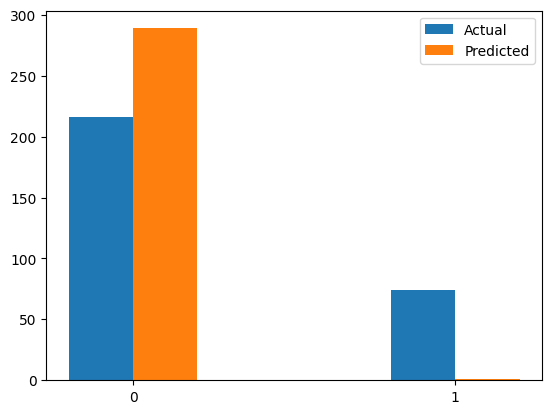

XGB accuracy over 10 rounds: 0.6687258292361505
Model evaluation metrics for XGB:
Precision: 0.2917495673753252
Recall: 0.2619858188970558
F1-score: 0.26998881811266096
AUC score: 0.530855146946239


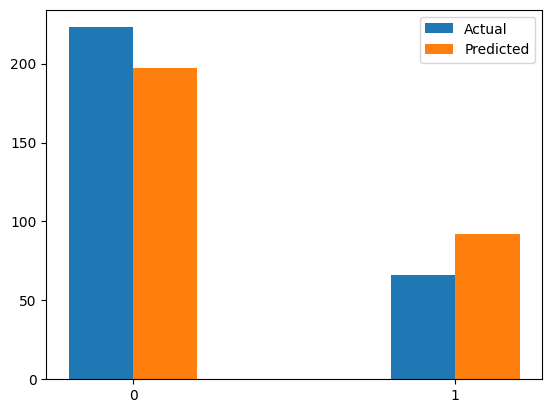



POPANE PHASES 1 --------------------------------------------------
APD PHASES 0 --------------------------------------------------
SVM accuracy over 10 rounds: 0.5262255684792164
LogReg accuracy over 10 rounds: 0.6539313965372975
Model evaluation metrics for LogReg:
Precision: 0.6606345117619788
Recall: 0.982032041237815
F1-score: 0.7895913318704164
AUC score: 0.4974917839081704


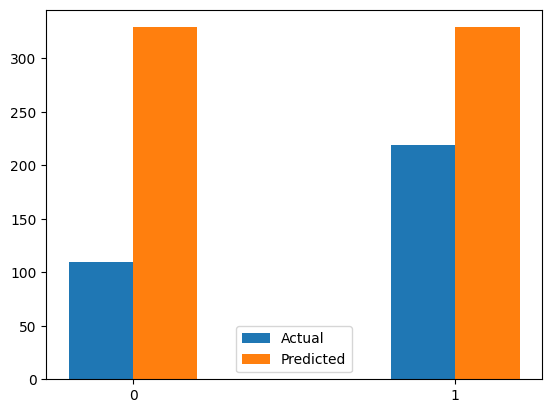

XGB accuracy over 10 rounds: 0.5708097967897415


POPANE PHASES 2 --------------------------------------------------
APD PHASES 0 --------------------------------------------------
SVM accuracy over 10 rounds: 0.7138297039466012
Model evaluation metrics for SVM:
Precision: 0.7834563185371517
Recall: 0.8653422711499659
F1-score: 0.8217349807702753
AUC score: 0.547179468656974


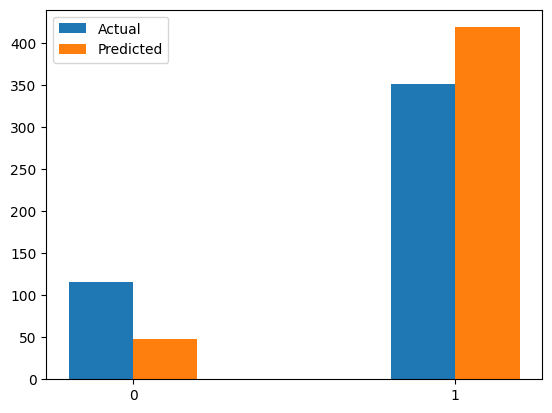

LogReg accuracy over 10 rounds: 0.7632520432921636
Model evaluation metrics for LogReg:
Precision: 0.7632520432921636
Recall: 1.0
F1-score: 0.8656726384695081
AUC score: 0.5


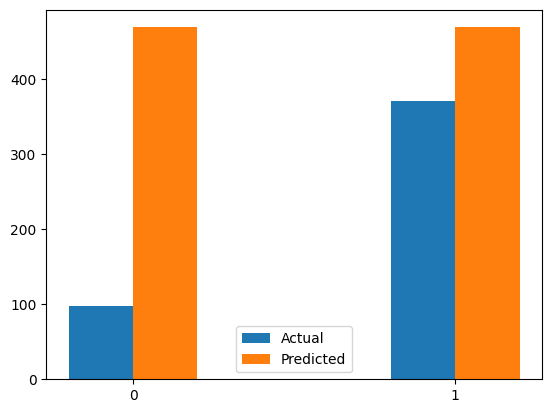

XGB accuracy over 10 rounds: 0.7072139926013691
Model evaluation metrics for XGB:
Precision: 0.7756409388446623
Recall: 0.8705733221859571
F1-score: 0.8188060272796192
AUC score: 0.5288951195889247


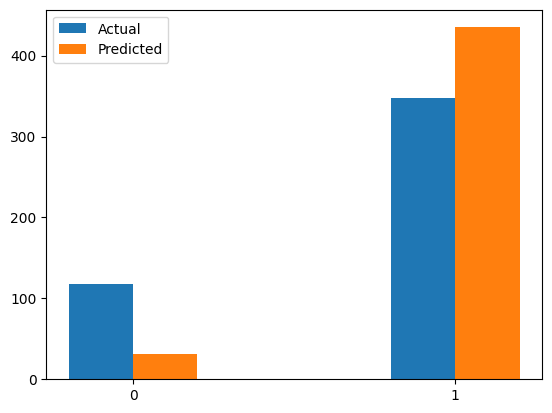



POPANE PHASES 0 --------------------------------------------------
APD PHASES 1 --------------------------------------------------
SVM accuracy over 10 rounds: 0.43724224104787285
LogReg accuracy over 10 rounds: 0.7647781025865383
Model evaluation metrics for LogReg:
Precision: 0.6041666666666666
Recall: 0.009575812852022528
F1-score: 0.017353604647569604
AUC score: 0.50190766323788


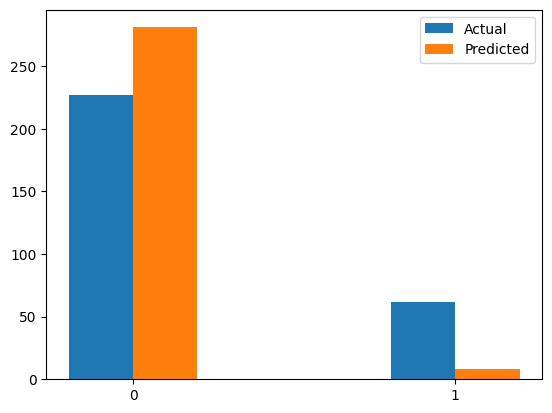

XGB accuracy over 10 rounds: 0.6741307885561256
Model evaluation metrics for XGB:
Precision: 0.30700222100569585
Recall: 0.3267846771913764
F1-score: 0.30657264463643435
AUC score: 0.5546262181023525


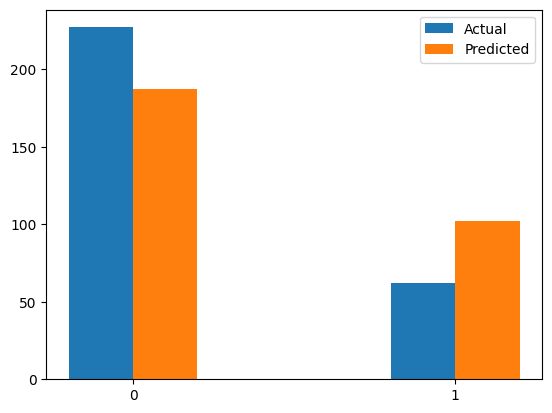



POPANE PHASES 1 --------------------------------------------------
APD PHASES 1 --------------------------------------------------
SVM accuracy over 10 rounds: 0.5274486144653915
LogReg accuracy over 10 rounds: 0.6626106230766512
Model evaluation metrics for LogReg:
Precision: 0.6626087809471495
Recall: 0.9995433789954337
F1-score: 0.7968845372316362
AUC score: 0.5006725903986178


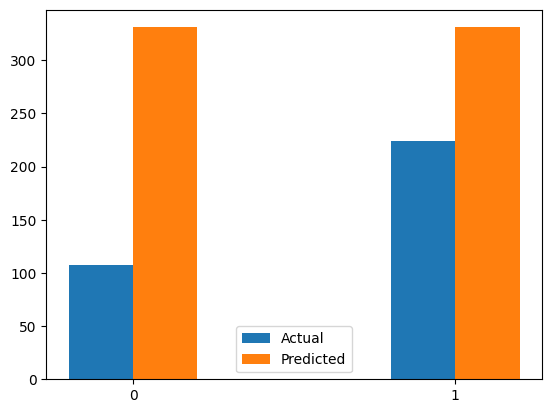

XGB accuracy over 10 rounds: 0.5799006279658075


POPANE PHASES 2 --------------------------------------------------
APD PHASES 1 --------------------------------------------------
SVM accuracy over 10 rounds: 0.7118494491285489
Model evaluation metrics for SVM:
Precision: 0.7869424850254764
Recall: 0.8546700822273751
F1-score: 0.8189072740038992
AUC score: 0.5544062853020414


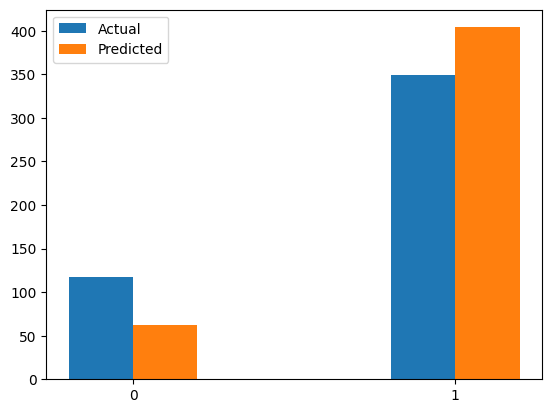

LogReg accuracy over 10 rounds: 0.7625716450291946
Model evaluation metrics for LogReg:
Precision: 0.7629032054353561
Recall: 0.9994475138121548
F1-score: 0.8652740899487286
AUC score: 0.4997237569060774


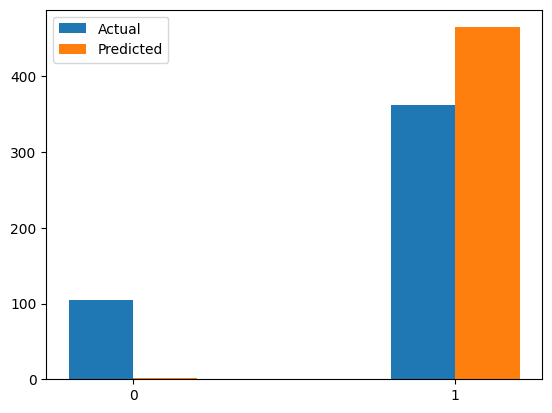

XGB accuracy over 10 rounds: 0.6977125551320817
Model evaluation metrics for XGB:
Precision: 0.7804913553120182
Recall: 0.8429862883907537
F1-score: 0.8084911351426916
AUC score: 0.5389195017186328


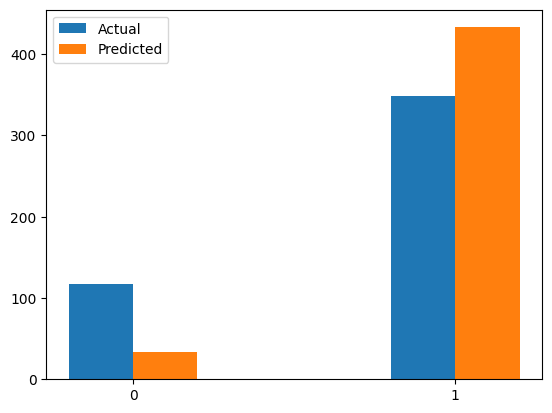



POPANE PHASES 0 --------------------------------------------------
APD PHASES 2 --------------------------------------------------
SVM accuracy over 10 rounds: 0.4283730123829154
LogReg accuracy over 10 rounds: 0.7723388363748362
Model evaluation metrics for LogReg:
Precision: 0.7370833333333333
Recall: 0.033241998132826286
F1-score: 0.05507700196660712
AUC score: 0.5118009110342481


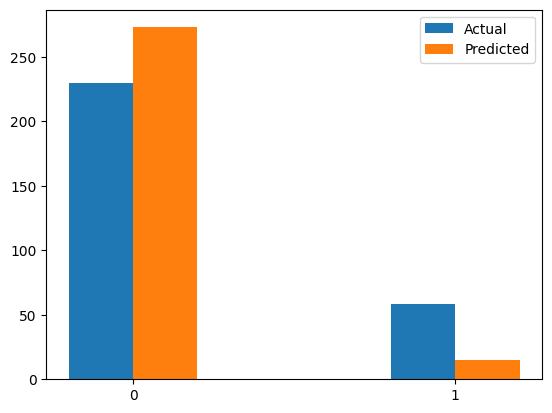

XGB accuracy over 10 rounds: 0.640413044686797


POPANE PHASES 1 --------------------------------------------------
APD PHASES 2 --------------------------------------------------
SVM accuracy over 10 rounds: 0.5084950247198753
LogReg accuracy over 10 rounds: 0.6643415792281255
Model evaluation metrics for LogReg:
Precision: 0.6717511473478859
Recall: 0.9795040965011198
F1-score: 0.7966634304340255
AUC score: 0.5002179377019887


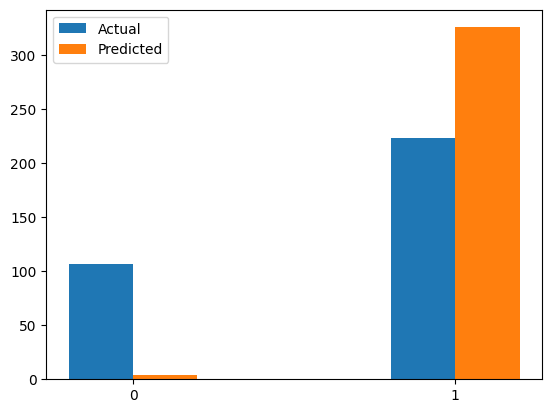

XGB accuracy over 10 rounds: 0.5588488081950832


POPANE PHASES 2 --------------------------------------------------
APD PHASES 2 --------------------------------------------------
SVM accuracy over 10 rounds: 0.7159427147534967
Model evaluation metrics for SVM:
Precision: 0.7761529049734234
Recall: 0.8784486447838207
F1-score: 0.8237396754188604
AUC score: 0.5457646571659474


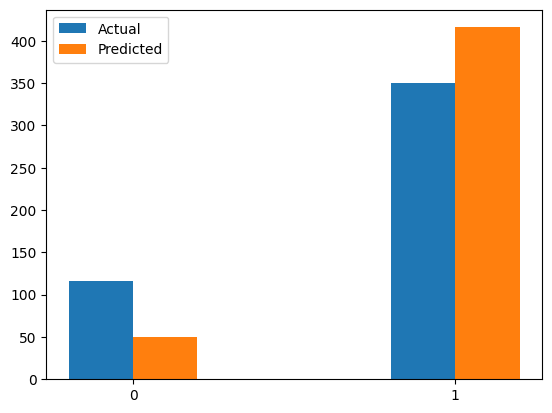

LogReg accuracy over 10 rounds: 0.7559902365797448
Model evaluation metrics for LogReg:
Precision: 0.7563196937571414
Recall: 0.9994435845844297
F1-score: 0.8610198106378935
AUC score: 0.49972179229221486


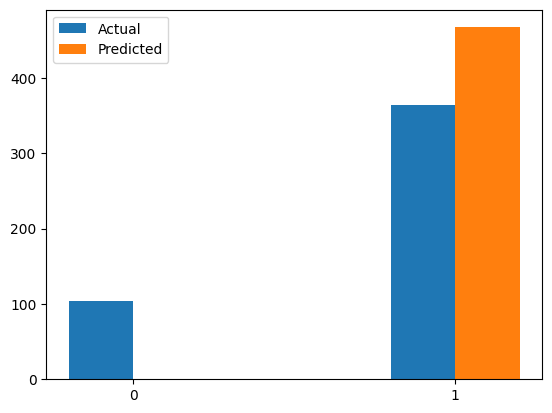

XGB accuracy over 10 rounds: 0.7112340620885254
Model evaluation metrics for XGB:
Precision: 0.776561167652949
Recall: 0.8701236899601135
F1-score: 0.8197637967463601
AUC score: 0.5453588326145661


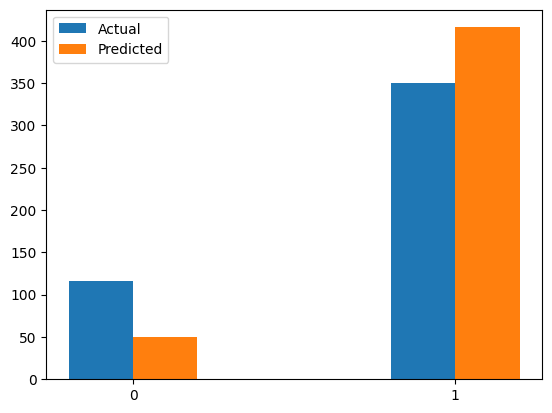



POPANE PHASES 0 --------------------------------------------------
APD PHASES 3 --------------------------------------------------
SVM accuracy over 10 rounds: 0.6062262046660114
LogReg accuracy over 10 rounds: 0.7627067319263708
Model evaluation metrics for LogReg:
Precision: 1.0
Recall: 0.0
F1-score: 0.0
AUC score: 0.5


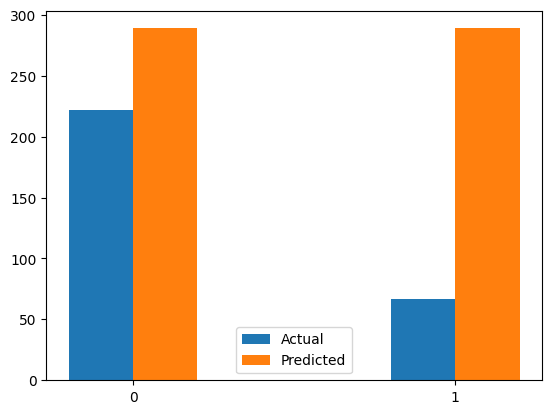

XGB accuracy over 10 rounds: 0.6683931991482945
Model evaluation metrics for XGB:
Precision: 0.2830208575980308
Recall: 0.2620455471659657
F1-score: 0.26955879214962863
AUC score: 0.5287999402195371


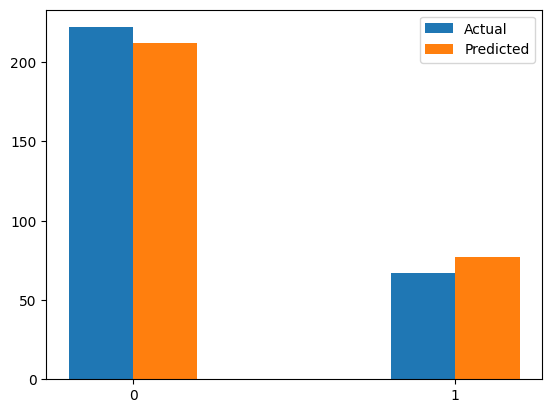



POPANE PHASES 1 --------------------------------------------------
APD PHASES 3 --------------------------------------------------
SVM accuracy over 10 rounds: 0.4998132402503076
LogReg accuracy over 10 rounds: 0.664244194240349
Model evaluation metrics for LogReg:
Precision: 0.6652760086379726
Recall: 0.9950423882769022
F1-score: 0.7973454665632358
AUC score: 0.5029296561290602


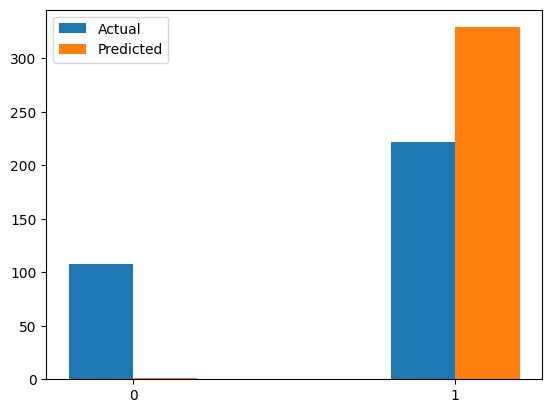

XGB accuracy over 10 rounds: 0.575969953314224


POPANE PHASES 2 --------------------------------------------------
APD PHASES 3 --------------------------------------------------
SVM accuracy over 10 rounds: 0.7028550593595801
Model evaluation metrics for SVM:
Precision: 0.7713103342357722
Recall: 0.8619240053804467
F1-score: 0.813628283326495
AUC score: 0.5405059923990582


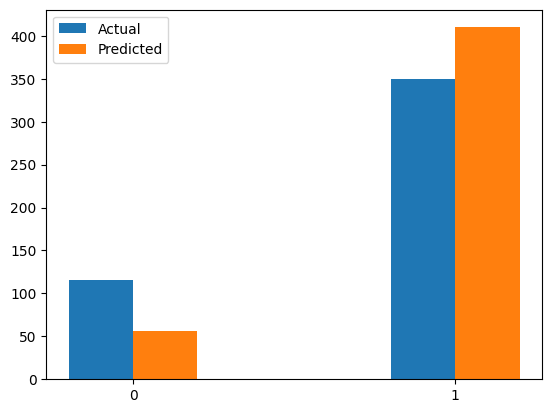

LogReg accuracy over 10 rounds: 0.7529573629481305
Model evaluation metrics for LogReg:
Precision: 0.7532870813520356
Recall: 0.9994444444444444
F1-score: 0.859036846204682
AUC score: 0.4997222222222222


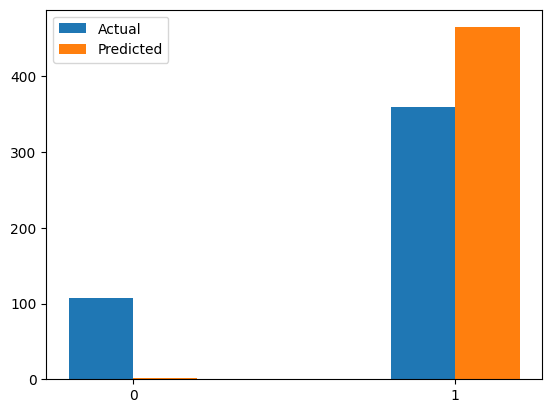

XGB accuracy over 10 rounds: 0.7126823649276939
Model evaluation metrics for XGB:
Precision: 0.7691354973827764
Recall: 0.8848150596552562
F1-score: 0.8225878686257276
AUC score: 0.5363928111111126


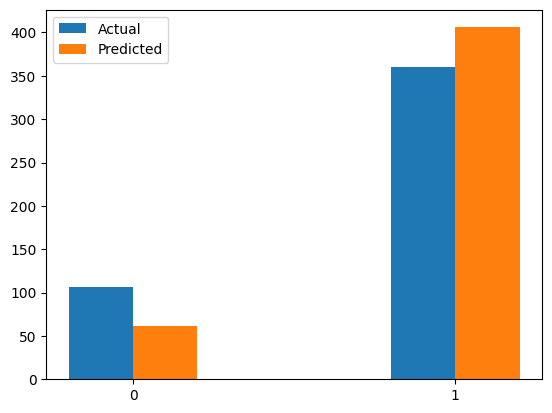



POPANE PHASES 0 --------------------------------------------------
APD PHASES 4 --------------------------------------------------
SVM accuracy over 10 rounds: 0.6076980256267482
LogReg accuracy over 10 rounds: 0.759343181998966
Model evaluation metrics for LogReg:
Precision: 1.0
Recall: 0.0
F1-score: 0.0
AUC score: 0.5


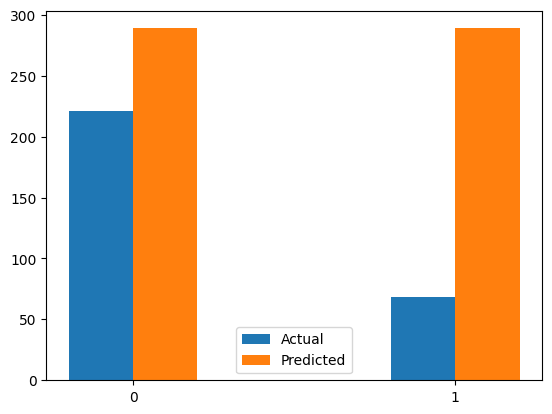

XGB accuracy over 10 rounds: 0.668971491402511
Model evaluation metrics for XGB:
Precision: 0.28615725112228996
Recall: 0.25095297469896866
F1-score: 0.2587267643869118
AUC score: 0.526807509058115


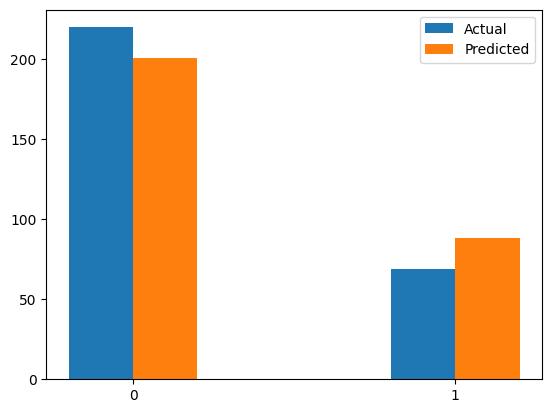



POPANE PHASES 1 --------------------------------------------------
APD PHASES 4 --------------------------------------------------
SVM accuracy over 10 rounds: 0.5077268454863944
LogReg accuracy over 10 rounds: 0.6659630009399299
Model evaluation metrics for LogReg:
Precision: 0.666391815265407
Recall: 0.997747530313902
F1-score: 0.7990236349342918
AUC score: 0.5016135483095783


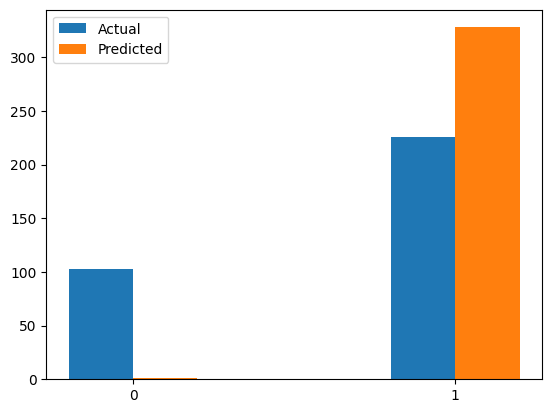

XGB accuracy over 10 rounds: 0.5592304393034975


POPANE PHASES 2 --------------------------------------------------
APD PHASES 4 --------------------------------------------------
SVM accuracy over 10 rounds: 0.7029244446989436
Model evaluation metrics for SVM:
Precision: 0.7716494339872952
Recall: 0.8614689091038545
F1-score: 0.8134489778400298
AUC score: 0.5418864660493874


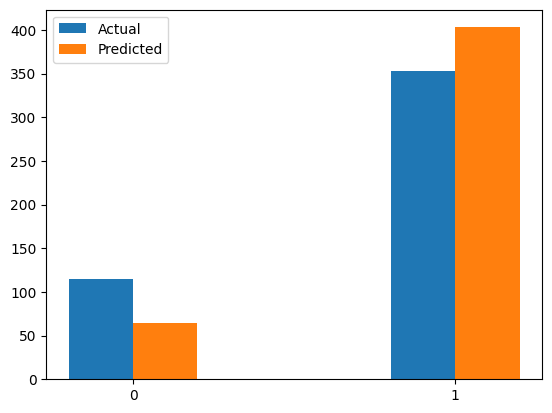

LogReg accuracy over 10 rounds: 0.7530573615962501
Model evaluation metrics for LogReg:
Precision: 0.7530573615962501
Recall: 1.0
F1-score: 0.8591111015258865
AUC score: 0.5


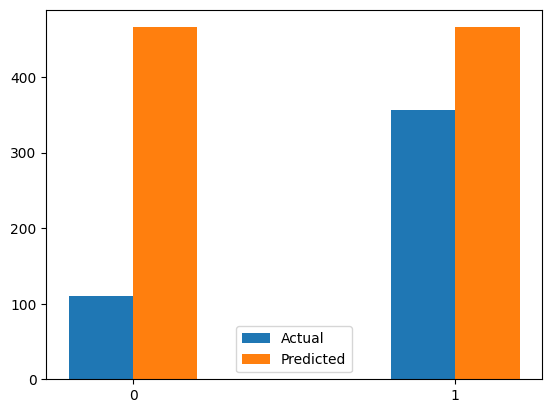

XGB accuracy over 10 rounds: 0.7052753453078329
Model evaluation metrics for XGB:
Precision: 0.7660339425615197
Recall: 0.878394160287826
F1-score: 0.8173958718015072
AUC score: 0.5295389731818122


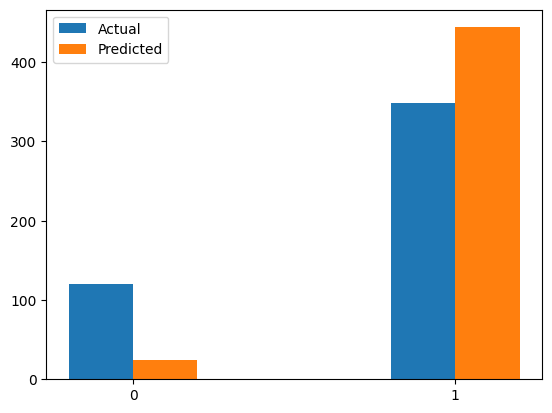

In [17]:
# TRAIN ON APD AND TEST ON POPANE
importlib.reload(train)
importlib.reload(dr_a)
importlib.reload(dr_p)
importlib.reload(dt)


for i, phases_apd in enumerate(model_phases_apd):
    for j, study in enumerate(studies_popane):
        print(f"POPANE PHASES {j} " + "-"*50)
        print(f"APD PHASES {i} " + "-"*50)
        x_a, y_a = train.Train_APD.get_apd_data_ranking(metrics, phases_apd, verbose=False, anxiety_label_type=apd_label_type)
        x_b, y_b = train.Train_POPANE.get_popane_data(study, metrics, model_phases_popane[j], verbose=False, label_type=popane_label_type)
        inds = pd.isnull(x_b).any(1).to_numpy().nonzero()[0]
        x_b = x_b.drop(inds, axis=0)
        y_b = y_b.drop(inds, axis=0)

        x_a = x_a.drop(["phaseId"], axis=1)
        x_b = x_b.drop(["phaseId"], axis=1)

        # drop subjects with noisy data
        x_a = x_a[x_a['subject'] != 84.0]
        x_a = x_a.drop(["anxietyGroup"], axis=1)  # drop anxietyGroup column because POPANE doesn't have this feature
        y_a = y_a[y_a['subject'] != 84.0]
        # x = x[x['subject'] != 8.0]
        # y = y[y['subject'] != 8.0]

        # make sure subjects from different datasets aren't labeled with the same index
        x_b["subject"] = x_b["subject"] + 500

        # 0-1 scaling
        for c in range(3, len(x_a.columns)):
            data_col = x_a[x_a.columns[c]]
            data_col = (data_col - data_col.min())/(data_col.max() - data_col.min())
            x_a[x_a.columns[c]] = data_col
        # 0-1 scaling
        for c in range(3, len(x_b.columns)):
            data_col = x_b[x_b.columns[c]]
            data_col = (data_col - data_col.min())/(data_col.max() - data_col.min())
            x_b[x_b.columns[c]] = data_col

        # print(y_a.loc[:, "label"].value_counts() + y_b.loc[:, "label"].value_counts())

        acc_results = {
            "SVM": [], 
            # "KNN": [],
            # "DT": [],
            "LogReg": [],
            # "Bayes": [],
            "XGB": []
        }
        reports = {
            "SVM": [], 
            # "KNN": [],
            # "DT": [],
            "LogReg": [],
            # "Bayes": [],
            "XGB": [],
        }
        num_iters = 10
        for _ in range(num_iters):
            out = train.Train_Multi_Dataset.train_across_datasets(models, x_a, y_a, x_b, y_b, by_subject=False, save_metrics=True, test_size=test_size)
            for model_name in acc_results:
                acc_results[model_name].append(out[model_name][0])
                reports[model_name].append(out[model_name][1])

        for model_name in acc_results.keys():
            acc = np.mean(acc_results[model_name])
            print(f"{model_name} accuracy over {num_iters} rounds: {acc}")
            if acc > 0.65:
                print(f"Model evaluation metrics for {model_name}:")
                p = np.mean([report["precision"] for report in reports[model_name]])
                r = np.mean([report["recall"] for report in reports[model_name]])
                f1 = np.mean([report["f1"] for report in reports[model_name]])
                idx = np.argmax([report["f1"] for report in reports[model_name]])
                auc = np.mean([report["auc"] for report in reports[model_name]])
                report = reports[model_name]
                print(f"Precision: {p}\nRecall: {r}\nF1-score: {f1}\nAUC score: {auc}")
                plot_y = reports[model_name][idx]["actual vs pred"]
                _, y_test_counts = np.unique(plot_y[0], return_counts=True)
                _, y_pred_counts = np.unique(plot_y[1], return_counts=True)
                br1 = [0, 0.5]
                br2 = [1, 1.5]
                
                x = [0, 1]
                x_axis = np.arange(len(x))
                plt.bar(x_axis-0.1, y_test_counts, 0.2, label="Actual")
                plt.bar(x_axis+0.1, y_pred_counts, 0.2, label="Predicted")
                plt.xticks(x_axis, x)
                plt.legend()
                plt.show()

        print("\n")

In [26]:
# TRAIN ON POPANE AND TEST ON APD
importlib.reload(train)
importlib.reload(dr_a)
importlib.reload(dr_p)
importlib.reload(dt)


for i, study in enumerate(studies_popane):
    for j, phases_apd in enumerate(model_phases_apd):
        print(f"POPANE PHASES {j} " + "-"*50)
        print(f"APD PHASES {i} " + "-"*50)
        x_a, y_a = train.Train_POPANE.get_popane_data(study, metrics, model_phases_popane[i], verbose=False, label_type=popane_label_type)
        x_b, y_b = train.Train_APD.get_apd_data_ranking(metrics, phases_apd, verbose=False, anxiety_label_type=apd_label_type)
        inds = pd.isnull(x_a).any(1).to_numpy().nonzero()[0]
        x_a = x_a.drop(inds, axis=0)
        y_a = y_a.drop(inds, axis=0)

        x_a = x_a.drop(["phaseId"], axis=1)
        x_b = x_b.drop(["phaseId"], axis=1)

        # drop subjects with noisy data
        x_b = x_b[x_b['subject'] != 84.0]
        x_b = x_b.drop(["anxietyGroup"], axis=1)  # drop anxietyGroup column because POPANE doesn't have this feature
        y_b = y_b[y_b['subject'] != 84.0]
        # x = x[x['subject'] != 8.0]
        # y = y[y['subject'] != 8.0]

        # make sure subjects from different datasets aren't labeled with the same index
        x_b["subject"] = x_b["subject"] + 500

        # 0-1 scaling
        for c in range(3, len(x_a.columns)):
            data_col = x_a[x_a.columns[c]]
            data_col = (data_col - data_col.min())/(data_col.max() - data_col.min())
            x_a[x_a.columns[c]] = data_col
        # 0-1 scaling
        for c in range(3, len(x_b.columns)):
            data_col = x_b[x_b.columns[c]]
            data_col = (data_col - data_col.min())/(data_col.max() - data_col.min())
            x_b[x_b.columns[c]] = data_col

        print(y_a.loc[:, "label"].value_counts() + y_b.loc[:, "label"].value_counts())
        
        acc_results = {
            "SVM": [], 
            # "KNN": [],
            # "DT": [],
            "LogReg": [],
            # "Bayes": [],
            "XGB": []
        }
        reports = {
            "SVM": [], 
            # "KNN": [],
            # "DT": [],
            "LogReg": [],
            # "Bayes": [],
            "XGB": [],
        }
        num_iters = 10
        for _ in range(num_iters):
            out = train.Train_Multi_Dataset.train_across_datasets(models, x_a, y_a, x_b, y_b, by_subject=False, save_metrics=True, test_size=test_size)
            for model_name in acc_results:
                acc_results[model_name].append(out[model_name][0])
                reports[model_name].append(out[model_name][1])

        for model_name in acc_results.keys():
            acc = np.mean(acc_results[model_name])
            print(f"{model_name} accuracy over {num_iters} rounds: {acc}")
            if acc > 0.65:
                print(f"Model evaluation metrics for {model_name}:")
                p = np.mean([report["precision"] for report in reports[model_name]])
                r = np.mean([report["recall"] for report in reports[model_name]])
                f1 = np.mean([report["f1"] for report in reports[model_name]])
                auc = np.mean([report["auc"] for report in reports[model_name]])
                report = reports[model_name]
                print(f"Precision: {p}\nRecall: {r}\nF1-score: {f1}\nAUC score: {auc}")
        print("\n")

POPANE PHASES 0 --------------------------------------------------
APD PHASES 0 --------------------------------------------------
0    429
1    397
Name: label, dtype: int64
SVM accuracy over 10 rounds: 0.32649098144165273
LogReg accuracy over 10 rounds: 0.5952970993325595
XGB accuracy over 10 rounds: 0.602473165796415


POPANE PHASES 1 --------------------------------------------------
APD PHASES 0 --------------------------------------------------
0    399
1    325
Name: label, dtype: int64
SVM accuracy over 10 rounds: 0.35041236984337126
LogReg accuracy over 10 rounds: 0.635268643343357
XGB accuracy over 10 rounds: 0.598327662058162


POPANE PHASES 2 --------------------------------------------------
APD PHASES 0 --------------------------------------------------
0    355
1    267
Name: label, dtype: int64
SVM accuracy over 10 rounds: 0.3088296582414561
LogReg accuracy over 10 rounds: 0.6721477536938423
Model evaluation metrics for LogReg:
Precision: 0.7030274559138832
Recall: 0.91